In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import mstats
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb

## ÉTAPE 1 : Chargement & Exploration initiale des données

In [2]:
df = pd.read_excel("avito_scraped_cars.xlsx")
df=pd.DataFrame(df)

In [3]:
df.head()

,id,list_id,title,description,price,old_price,location,ad_type,category,phone,...,alloy_wheels,speed_limiter,onboard_computer,rear_radar,cruise_control,leather_seats,navigation,sunroof,central_locking,electric_windows
0,75444387,56191250,meilleur Location de voiture,meilleur Location de voiture avec meilleurs prix,450.0,NaN,Casablanca,à louer,Voitures de location,661412363.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75007294,55835159,Mercedes-Benz Classe CLA Diesel Automatique 2025,mercedes CLA 220 DIESEL voiture toute option p...,NaN,NaN,Rabat,à vendre,Voitures d'occasion,666187046.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,75008804,55842308,Location de clio 5 a Casablanca,Location de voiture a Casablanca a bas prix et...,NaN,NaN,Casablanca,à louer,Voitures de location,661985172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75020424,55845764,KIFAL - VOLKSWAGEN Touareg,Référence Kifal : #VEH0000VMI\nKIFAL AUTO s'oc...,365000.0,NaN,Casablanca,à vendre,Voitures d'occasion,703117060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75381400,56140161,opel corsa,•avito / moteur.ma vous proposer :\n\n•opel - ...,198000.0,NaN,Casablanca,à vendre,Voitures d'occasion,777432421.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(20747, 42)

In [5]:
df.columns

Index(['id', 'list_id', 'title', 'description', 'price', 'old_price',
       'location', 'ad_type', 'category', 'phone', 'seller_name',
       'seller_type', 'seller_verified', 'type', 'sector', 'mileage', 'brand',
       'model', 'doors', 'origin', 'first_owner', 'fiscal_power', 'condition',
       'year', 'gearbox', 'fuel_type', 'abs', 'airbags', 'audio_system',
       'rear_camera', 'ac', 'esp', 'alloy_wheels', 'speed_limiter',
       'onboard_computer', 'rear_radar', 'cruise_control', 'leather_seats',
       'navigation', 'sunroof', 'central_locking', 'electric_windows'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20747 entries, 0 to 20746
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20747 non-null  int64  
 1   list_id           20747 non-null  int64  
 2   title             20747 non-null  object 
 3   description       20746 non-null  object 
 4   price             16079 non-null  float64
 5   old_price         0 non-null      float64
 6   location          20747 non-null  object 
 7   ad_type           20747 non-null  object 
 8   category          20747 non-null  object 
 9   phone             18835 non-null  float64
 10  seller_name       20747 non-null  object 
 11  seller_type       20747 non-null  object 
 12  seller_verified   20747 non-null  bool   
 13  type              19213 non-null  object 
 14  sector            361 non-null    object 
 15  mileage           16575 non-null  object 
 16  brand             16575 non-null  object

In [7]:
df.describe()

,id,list_id,price,old_price,phone,doors,abs,airbags,audio_system,rear_camera,...,alloy_wheels,speed_limiter,onboard_computer,rear_radar,cruise_control,leather_seats,navigation,sunroof,central_locking,electric_windows
count,2.074700e+04,2.074700e+04,1.607900e+04,0.0,1.883500e+04,14593.000000,9337.000000,10376.000000,9439.000000,6359.000000,...,9202.000000,8233.000000,7652.000000,8025.000000,8311.000000,4850.000000,6513.000000,2955.000000,9805.000000,10580.000000
mean,7.477493e+07,5.568910e+07,2.172028e+05,NaN,6.684833e+08,4.892962,0.997858,0.996916,0.994597,0.973109,...,0.992719,0.993441,0.992551,0.985545,0.991216,0.952371,0.980961,0.891709,0.996940,0.997164
std,1.897024e+06,1.295442e+06,9.014157e+05,NaN,4.301822e+07,0.450147,0.046235,0.055451,0.073311,0.161778,...,0.085022,0.080726,0.085991,0.119364,0.093314,0.213002,0.136672,0.310800,0.055232,0.053177
min,2.844187e+07,2.255146e+07,1.000000e+00,NaN,5.204951e+08,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.468815e+07,5.558611e+07,5.500000e+04,NaN,6.455551e+08,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,7.505973e+07,5.587838e+07,1.180000e+05,NaN,6.625272e+08,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,7.538108e+07,5.614012e+07,1.880000e+05,NaN,6.819112e+08,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,7.559184e+07,5.631256e+07,5.800000e+07,NaN,8.086852e+08,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## ÉTAPE 2 :  Nettoyage et transformation initiale des données brutes

In [8]:
# 1_nombre des valeurs null dans les données
print("afficher juste les valeurs manquantes dans dataFrame")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

afficher juste les valeurs manquantes dans dataFrame
description             1
price                4668
old_price           20747
phone                1912
type                 1534
sector              20386
mileage              4172
brand                4172
model                4172
doors                6154
origin               6183
first_owner          6525
fiscal_power         4195
condition            4883
year                 4149
gearbox              4195
fuel_type            4161
abs                 11410
airbags             10371
audio_system        11308
rear_camera         14388
ac                   9826
esp                 13606
alloy_wheels        11545
speed_limiter       12514
onboard_computer    13095
rear_radar          12722
cruise_control      12436
leather_seats       15897
navigation          14234
sunroof             17792
central_locking     10942
electric_windows    10167
dtype: int64


In [9]:
# 2_Supprimer les colonnes avec trop de valeurs manquantes
threshold = len(df) * 0.7
df= df.dropna(thresh=threshold, axis=1)
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])
df.shape

description        1
price           4668
phone           1912
type            1534
mileage         4172
brand           4172
model           4172
doors           6154
origin          6183
fiscal_power    4195
condition       4883
year            4149
gearbox         4195
fuel_type       4161
dtype: int64


(20747, 23)

In [10]:
# 3_supprision des attributs n'est pas importance
df.drop(columns=['id','seller_type', 'list_id','phone','description','seller_name','seller_verified','title'], inplace=True)
df.head()

,price,location,ad_type,category,type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,450.0,Casablanca,à louer,Voitures de location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Rabat,à vendre,Voitures d'occasion,"Voitures d'occasion, à vendre",0 - 4 999,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8 CV,Excellent,2025,Automatique,Diesel
2,NaN,Casablanca,à louer,Voitures de location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,365000.0,Casablanca,à vendre,Voitures d'occasion,"Voitures d'occasion, à vendre",140 000 - 149 999,Volkswagen,Touareg,NaN,NaN,12 CV,NaN,2021,Automatique,Diesel
4,198000.0,Casablanca,à vendre,Voitures d'occasion,"Voitures d'occasion, à vendre",0 - 4 999,Opel,Corsa,5.0,WW au Maroc,6 CV,Excellent,2024,Manuelle,Diesel


In [11]:
nombre_doublons = df.duplicated().sum()
print(nombre_doublons)
df = df.drop_duplicates()
nombre_doublons2 = df.duplicated().sum()
print(nombre_doublons2)

2102
0


In [12]:
# 4_ garder uniquement les voix à vendre
df = df[df['ad_type'] == 'à vendre']
df.drop(columns=['ad_type'], inplace=True)
df.head()

,price,location,category,type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
1,NaN,Rabat,Voitures d'occasion,"Voitures d'occasion, à vendre",0 - 4 999,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8 CV,Excellent,2025,Automatique,Diesel
3,365000.0,Casablanca,Voitures d'occasion,"Voitures d'occasion, à vendre",140 000 - 149 999,Volkswagen,Touareg,NaN,NaN,12 CV,NaN,2021,Automatique,Diesel
4,198000.0,Casablanca,Voitures d'occasion,"Voitures d'occasion, à vendre",0 - 4 999,Opel,Corsa,5.0,WW au Maroc,6 CV,Excellent,2024,Manuelle,Diesel
5,79000.0,Casablanca,Voitures d'occasion,"Voitures d'occasion, à vendre",170 000 - 179 999,Renault,Megane,3.0,WW au Maroc,7 CV,Bon,2009,Manuelle,Diesel
6,93000.0,Casablanca,Voitures d'occasion,"Voitures d'occasion, à vendre",75 000 - 79 999,Fiat,500,5.0,WW au Maroc,6 CV,Très bon,2017,Manuelle,Diesel


In [13]:
# 5_garder just les lignes de vendre des voitures 

In [14]:
# print(df['category'].unique())
# print()
# print(df['type'].unique())

In [15]:
# result = df[df['category'] == 'Autre Immobilier']
# print(result)

In [16]:
# min_non_nan = int(df.shape[1] * 0.2)
# df = df.dropna(thresh=min_non_nan)
# df.shape

In [17]:
# print(df['category'].unique())

In [18]:
# result = df[df['category'] == 'Appartements']
# print(result)

In [19]:
colonnes_a_verifier = ['brand', 'model', 'doors', 'origin', 'fiscal_power', 'condition', 'year', 'gearbox', 'fuel_type', 'mileage']
#tester avce la supprission de year et origin 
mask_all_nan = df[colonnes_a_verifier].isna().all(axis=1)
df = df[~mask_all_nan].copy()
print(df['category'].unique())
print()
print(df['type'].unique())
df.shape

["Voitures d'occasion" 'Motos']

["Voitures d'occasion, à vendre" 'Motos, à vendre']


(15963, 14)

In [20]:
result = df[df['category'] == 'Motos']
print(result)

          price    location category             type mileage brand model  \
2531    45000.0   Marrakech    Motos  Motos, à vendre     NaN   NaN   NaN   
2727    54999.0  Casablanca    Motos  Motos, à vendre     NaN   NaN   NaN   
3036        NaN      Temara    Motos  Motos, à vendre     NaN   NaN   NaN   
3551        NaN         Fès    Motos  Motos, à vendre     NaN   NaN   NaN   
4968    70000.0      Temara    Motos  Motos, à vendre     NaN   NaN   NaN   
7645   135000.0       Rabat    Motos  Motos, à vendre     NaN   NaN   NaN   
8662   285000.0  Casablanca    Motos  Motos, à vendre     NaN   NaN   NaN   
11405   52000.0  Casablanca    Motos  Motos, à vendre     NaN   NaN   NaN   
11628       NaN      Meknès    Motos  Motos, à vendre     NaN   NaN   NaN   
12077  235000.0    Bouznika    Motos  Motos, à vendre     NaN   NaN   NaN   
12342  255000.0  Casablanca    Motos  Motos, à vendre     NaN   NaN   NaN   
13032  110000.0   Marrakech    Motos  Motos, à vendre     NaN   NaN   NaN   

In [21]:
df = df[df['category'] != 'Motos'].reset_index(drop=True)
print(df['category'].unique())
print(df['type'].unique())
df.shape

["Voitures d'occasion"]
["Voitures d'occasion, à vendre"]


(15947, 14)

In [22]:
# 6_aprés fair l'analyse sur les attributs category et type on a pas besoin de cette attributs 
df.drop(columns=['category','type'], inplace=True)
df.head()

,price,location,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,NaN,Rabat,0 - 4 999,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8 CV,Excellent,2025,Automatique,Diesel
1,365000.0,Casablanca,140 000 - 149 999,Volkswagen,Touareg,NaN,NaN,12 CV,NaN,2021,Automatique,Diesel
2,198000.0,Casablanca,0 - 4 999,Opel,Corsa,5.0,WW au Maroc,6 CV,Excellent,2024,Manuelle,Diesel
3,79000.0,Casablanca,170 000 - 179 999,Renault,Megane,3.0,WW au Maroc,7 CV,Bon,2009,Manuelle,Diesel
4,93000.0,Casablanca,75 000 - 79 999,Fiat,500,5.0,WW au Maroc,6 CV,Très bon,2017,Manuelle,Diesel


In [23]:
# 7_gestion de probléme des plages dans l'attribut mileage
def convert_range_to_number(s):
    if pd.isna(s):
        return np.nan
    s = s.replace(' ', '')
    if '-' in s:
        parts = s.split('-')
        try:
            low = int(parts[0])
            high = int(parts[1])
            return (low + high) / 2
        except:
            return np.nan
    else:
        try:
            return int(s)
        except:
            return np.nan
df['mileage'] = df['mileage'].apply(convert_range_to_number)
df.head()

,price,location,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,NaN,Rabat,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8 CV,Excellent,2025,Automatique,Diesel
1,365000.0,Casablanca,144999.5,Volkswagen,Touareg,NaN,NaN,12 CV,NaN,2021,Automatique,Diesel
2,198000.0,Casablanca,2499.5,Opel,Corsa,5.0,WW au Maroc,6 CV,Excellent,2024,Manuelle,Diesel
3,79000.0,Casablanca,174999.5,Renault,Megane,3.0,WW au Maroc,7 CV,Bon,2009,Manuelle,Diesel
4,93000.0,Casablanca,77499.5,Fiat,500,5.0,WW au Maroc,6 CV,Très bon,2017,Manuelle,Diesel


In [24]:
# 8_gestion de probléme d'attribut fiscal_power 
def safe_extract(val):
    numbers = re.findall(r'\d+', str(val))
    return int(numbers[0]) if numbers else None

df['fiscal_power'] = df['fiscal_power'].apply(safe_extract)
df.head()

,price,location,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,NaN,Rabat,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,Excellent,2025,Automatique,Diesel
1,365000.0,Casablanca,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,NaN,2021,Automatique,Diesel
2,198000.0,Casablanca,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,Excellent,2024,Manuelle,Diesel
3,79000.0,Casablanca,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,Bon,2009,Manuelle,Diesel
4,93000.0,Casablanca,77499.5,Fiat,500,5.0,WW au Maroc,6.0,Très bon,2017,Manuelle,Diesel


In [25]:
# 9_convertire les champs cartéristique 
cols_to_lower = ["fuel_type", "gearbox", "condition", "location"]
df[cols_to_lower] = df[cols_to_lower].map(lambda x: str(x).lower() if pd.notnull(x) else x)
for col in cols_to_lower:
    df[col] = df[col].astype(str).str.strip()
df.head()

,price,location,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,NaN,rabat,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,excellent,2025,automatique,diesel
1,365000.0,casablanca,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,nan,2021,automatique,diesel
2,198000.0,casablanca,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,excellent,2024,manuelle,diesel
3,79000.0,casablanca,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,bon,2009,manuelle,diesel
4,93000.0,casablanca,77499.5,Fiat,500,5.0,WW au Maroc,6.0,très bon,2017,manuelle,diesel


## ÉTAPE 3 : Gestion des données catégorielles

In [26]:
# 1_afficher les valers manquants dans dataFrame pour traité les varibales caté
print(df.isnull().sum())

price           3599
location           0
mileage           64
brand             11
model             11
doors           1943
origin          1980
fiscal_power      34
condition          0
year               4
gearbox            0
fuel_type          0
dtype: int64


In [27]:
# 3_encodage ordinal d'attribut condition 
frequences = df['condition'].value_counts()
print(frequences)

condition
excellent      7335
très bon       5534
bon            1606
nan             716
neuf            573
correct         164
pour pièces      11
endommagé         8
Name: count, dtype: int64


In [28]:
from joblib import dump
ordre_condition = {
    'pour pièces': 0,
    'endommagé': 1,
    'correct': 2,
    'bon': 3,
    'très bon': 4,
    'excellent': 5,
    'neuf': 6,
}
df['condition'] = df['condition'].map(ordre_condition)
dump(ordre_condition, 'ordre_condition.joblib')
df.head()

,price,location,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,NaN,rabat,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,5.0,2025,automatique,diesel
1,365000.0,casablanca,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,NaN,2021,automatique,diesel
2,198000.0,casablanca,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,5.0,2024,manuelle,diesel
3,79000.0,casablanca,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3.0,2009,manuelle,diesel
4,93000.0,casablanca,77499.5,Fiat,500,5.0,WW au Maroc,6.0,4.0,2017,manuelle,diesel


In [29]:
# 4_encodage de gearbox
print(df['gearbox'].value_counts())

gearbox
manuelle       9582
automatique    6331
nan              34
Name: count, dtype: int64


In [30]:
# le = LabelEncoder()
# df['gearbox'] = le.fit_transform(df['gearbox'])
# frequences = df['gearbox'].value_counts()
# print(frequences)

In [31]:
# 5_encodage de champs fuel_type
frequences = df['fuel_type'].value_counts()
print(frequences)

fuel_type
diesel        13040
essence        2617
hybride         218
electrique       59
lpg              13
Name: count, dtype: int64


In [32]:
from sklearn.preprocessing import LabelEncoder
df['fuel_type'] = df['fuel_type'].replace({
    'lpg': 'autre',
    'electrique': 'autre',
    'hybride': 'autre'
})
frequences = df['fuel_type'].value_counts()
print(frequences)
# le = LabelEncoder()
# df['fuel_type_encoded'] = le.fit_transform(df['fuel_type'])
# df.drop('fuel_type', axis=1, inplace=True)


fuel_type
diesel     13040
essence     2617
autre        290
Name: count, dtype: int64


In [33]:
df.head()

,price,location,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,NaN,rabat,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,5.0,2025,automatique,diesel
1,365000.0,casablanca,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,NaN,2021,automatique,diesel
2,198000.0,casablanca,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,5.0,2024,manuelle,diesel
3,79000.0,casablanca,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3.0,2009,manuelle,diesel
4,93000.0,casablanca,77499.5,Fiat,500,5.0,WW au Maroc,6.0,4.0,2017,manuelle,diesel


In [34]:
# 6_encodage de champs location 
nombre_villes = df['location'].nunique() 
print("Nombre de villes uniques :" ,nombre_villes)

Nombre de villes uniques : 195


In [35]:
ville_region = {
    'rabat': 'Rabat-Salé-Kénitra',
    'الرباط': 'Rabat-Salé-Kénitra',
    'casablanca': 'Casablanca-Settat',
    'الدار البيضاء': 'Casablanca-Settat',
    'kénitra': 'Rabat-Salé-Kénitra',
    'fès': 'Fès-Meknès',
    'béni mellal': 'Béni Mellal-Khénifra',
    'salé': 'Rabat-Salé-Kénitra',
    'tanger': 'Tanger-Tétouan-Al Hoceima',
    'agadir': 'Souss-Massa',
    'nador': "L'Oriental",
    'berrechid': 'Casablanca-Settat',
    'marrakech': 'Marrakech-Safi',
    'مراكش': 'Marrakech-Safi',
    'mohammedia': 'Casablanca-Settat',
    'ain aouda': 'Rabat-Salé-Kénitra',
    'souk sebt ouled nemma': 'Béni Mellal-Khénifra',
    'settat': 'Casablanca-Settat',
    'oujda': "L'Oriental",
    'temara': 'Rabat-Salé-Kénitra',
    'el jadida': 'Casablanca-Settat',
    'meknès': 'Fès-Meknès',
    'tétouan': 'Tanger-Tétouan-Al Hoceima',
    'fnideq': 'Tanger-Tétouan-Al Hoceima',
    'bouskoura': 'Casablanca-Settat',
    'safi': 'Marrakech-Safi',
    'sidi slimane': 'Rabat-Salé-Kénitra',
    'larache': 'Tanger-Tétouan-Al Hoceima',
    'bouznika': 'Rabat-Salé-Kénitra',
    'dar bouazza': 'Casablanca-Settat',
    'ouad eddahab': 'Dakhla-Oued Ed-Dahab',
    'essaouira': 'Marrakech-Safi',
    'taza': 'Fès-Meknès',
    'sefrou': 'Fès-Meknès',
    'boufkrane': 'Fès-Meknès',
    'chichaoua': 'Marrakech-Safi',
    'errachidia': 'Drâa-Tafilalet',
    'ain harrouda': 'Casablanca-Settat',
    'khouribga': 'Béni Mellal-Khénifra',
    'azrou': 'Fès-Meknès',
    'oued zem': 'Béni Mellal-Khénifra',
    'moulay bousselham': 'Rabat-Salé-Kénitra',
    'tiznit': 'Souss-Massa',
    'tafraout': 'Souss-Massa',
    'tata': 'Guelmim-Oued Noun',
    'tifelt': 'Rabat-Salé-Kénitra',
    'missour': 'Drâa-Tafilalet',
    'sidi kacem': 'Rabat-Salé-Kénitra',
    'deroua': 'Casablanca-Settat',
    'dakhla': 'Dakhla-Oued Ed-Dahab',
    'zagora': 'Drâa-Tafilalet',
    'had soualem': 'Casablanca-Settat',
    'tan-tan': 'Guelmim-Oued Noun',
    'laâyoune': 'Laâyoune-Sakia El Hamra',
    'saidia': "L'Oriental",
    'daoura': 'Casablanca-Settat',
    'أكادير': 'Souss-Massa',
    'khemisset': 'Rabat-Salé-Kénitra',
    'mechra bel ksiri': 'Rabat-Salé-Kénitra',
    'el mansouria': 'Rabat-Salé-Kénitra',
    'el kelâa des sraghna': 'Marrakech-Safi',
    'al hoceima': 'Tanger-Tétouan-Al Hoceima',
    'k': 'Fès-Meknès',
    'ain sbit': 'Casablanca-Settat',
    'el hajeb': 'Fès-Meknès',
    'fquih ben saleh': 'Béni Mellal-Khénifra',
    'skhirat': 'Rabat-Salé-Kénitra',
    'asilah': 'Tanger-Tétouan-Al Hoceima',
    'guelmim': 'Guelmim-Oued Noun',
    'ouarzazate': 'Drâa-Tafilalet',
    'guercif': "L'Oriental",
    'taroudant': 'Souss-Massa',
    'ifrane': 'Fès-Meknès',
    'laattaouia': 'Casablanca-Settat',
    'berkane': "L'Oriental",
    'midelt': 'Drâa-Tafilalet',
    'tamesna': 'Rabat-Salé-Kénitra',
    'chefchaouen': 'Tanger-Tétouan-Al Hoceima',
    'kasba tadla': 'Béni Mellal-Khénifra',
    'khénifra': 'Béni Mellal-Khénifra',
    'martil': 'Tanger-Tétouan-Al Hoceima',
    'ouled teïma': 'Souss-Massa',
    'taounate': 'Fès-Meknès',
    'benslimane': 'Casablanca-Settat',
    'mdiq': 'Tanger-Tétouan-Al Hoceima',
    'ouazzane': 'Tanger-Tétouan-Al Hoceima',
    'jorf': 'Béni Mellal-Khénifra',
    'outat el haj': 'Fès-Meknès',
    'ait melloul': 'Souss-Massa',
    'selouane': 'Tanger-Tétouan-Al Hoceima',
    'ait ourir': 'Marrakech-Safi',
    'belfaa': 'Fès-Meknès',
    'ain taoujdate': 'Fès-Meknès',
    'ben guerir': 'Marrakech-Safi',
    "mrir't": 'Fès-Meknès',
    'azilal': 'Béni Mellal-Khénifra',
    'agadir melloul': 'Souss-Massa',
    'sebt gzoula': 'Casablanca-Settat',
    'tit mellil': 'Casablanca-Settat',
    'youssoufia': 'Marrakech-Safi',
    'ain tizgha': 'Souss-Massa',
    'tinghir': 'Drâa-Tafilalet',
    'gzenaya al janoubia': 'Tanger-Tétouan-Al Hoceima',
    'ksar el-kebir': 'Tanger-Tétouan-Al Hoceima',
    'tamensourt': 'Casablanca-Settat',
    'inzegan': 'Souss-Massa',
    'sidi bennour': 'Casablanca-Settat',
    'sidi bou othmane': 'Casablanca-Settat',
    'biougra': 'Souss-Massa',
    'bejaad': 'Fès-Meknès',
    'souk el arbaa': 'Casablanca-Settat',
    'tahla': 'Fès-Meknès',
    'demnate': 'Marrakech-Safi',
    'bni tadjite': 'Fès-Meknès',
    'bouarfa': "L'Oriental",
    'ouled berhil': 'Marrakech-Safi',
    'azemmour': 'Casablanca-Settat',
    'driouch': "L'Oriental",
    'guigou': 'Fès-Meknès',
    'tarfaya': 'Laâyoune-Sakia El Hamra',
    'jorf el melha': 'Béni Mellal-Khénifra',
    'karia ba mohamed': 'Tanger-Tétouan-Al Hoceima',
    'errahma': 'Casablanca-Settat',
    'lahraouyine': 'Casablanca-Settat',
    'meknassa al gharbia': 'Casablanca-Settat',
    'zaouïat cheikh': 'Casablanca-Settat',
    'nouaceur': 'Casablanca-Settat',
    'houara oulad raho': 'Casablanca-Settat',
    'mediouna': 'Casablanca-Settat',
    'sidi rahal': 'Casablanca-Settat',
    'sidi allal el bahraoui': 'Rabat-Salé-Kénitra',
    'tnine aglou': 'Souss-Massa',
    'ahfir': "L'Oriental",
    'skhinate': "L'Oriental",
    'taourirt': "L'Oriental",
    'es-semara': 'Laâyoune-Sakia El Hamra',
    'dcheïra el jihadia': 'Souss-Massa',
    'echemmaia': 'Marrakech-Safi',
    'el ksiba': 'Béni Mellal-Khénifra',
    'agdz': 'Drâa-Tafilalet',
    'el menzeh': 'Casablanca-Settat',
    'lqliaa': 'Casablanca-Settat',
    'ouislane': 'Fès-Meknès',
    'sidi slimane echcharraa': 'Rabat-Salé-Kénitra',
    'goulmima': 'Drâa-Tafilalet',
    'tamaris': 'Casablanca-Settat',
    'imintanoute': 'Marrakech-Safi',
    'sidi yahya el gharb': 'Rabat-Salé-Kénitra',
    'imi ouaddar': 'Souss-Massa',
    'mkansa': 'Casablanca-Settat',
    'ait yaazem': 'Fès-Meknès',
    'boujniba': 'Béni Mellal-Khénifra',
    'figuig': "L'Oriental",
    'tikiouine': 'Souss-Massa',
    'bir jdid': 'Casablanca-Settat',
    'agourai': 'Marrakech-Safi',
    'bni ansar': "L'Oriental",
    'taghazout': 'Souss-Massa',
    'boujdour': 'Laâyoune-Sakia El Hamra',
    'zaouiat sidi kacem': 'Rabat-Salé-Kénitra',
    'assa': 'Guelmim-Oued Noun',
    'itzer': 'Tanger-Tétouan-Al Hoceima',
    'had kourt': 'Casablanca-Settat',
    'sidi ifni': 'Guelmim-Oued Noun',
    'mehdia': 'Casablanca-Settat',
    'sidi bouzid': 'Casablanca-Settat',
    'el menzel': 'Casablanca-Settat',
    'ain attig': 'Fès-Meknès',
    'khemisset chaouia': 'Rabat-Salé-Kénitra',
    'hassi berkane': "L'Oriental",
    'aknoul': 'Fès-Meknès',
    'imouzzer-kendar': 'Tanger-Tétouan-Al Hoceima',
    'mers el kheir': 'Tanger-Tétouan-Al Hoceima',
    'ben ahmed': 'Casablanca-Settat',
    'amizmiz': 'Marrakech-Safi',
    'béni yakhlef': 'Béni Mellal-Khénifra',
    'lakhoualqa': 'Béni Mellal-Khénifra',
    'sabaa aiyoun': 'Fès-Meknès',
    'laattaouia ech-chaybia': 'Casablanca-Settat',
    'boulemane': 'Fès-Meknès',
    'zemamra': 'Casablanca-Settat',
    'arfoud': 'Drâa-Tafilalet',
    'zaïo': "L'Oriental",
    'sidi bibi': 'Souss-Massa',
    'zenata': 'Casablanca-Settat',
    'oualidia': 'Casablanca-Settat',
    'ait amira': 'Souss-Massa',
    'dcheira': 'Souss-Massa',
    'al aaroui': "L'Oriental",
    'tendrara': "L'Oriental",
    'bouizakarne': 'Guelmim-Oued Noun',
    'boumalne-dadès': 'Drâa-Tafilalet',
    'naour': 'Casablanca-Settat',
    'sidi smail': 'Casablanca-Settat',
    'oued amlil': 'Fès-Meknès',
}
df['region'] = df['location'].map(ville_region)
nombre_reg = df['region'].nunique()
print("Nombre de villes uniques avant suppression :" ,nombre_reg)
df = df.drop('location', axis=1)
df.head()

Nombre de villes uniques avant suppression : 12


,price,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type,region
0,NaN,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,5.0,2025,automatique,diesel,Rabat-Salé-Kénitra
1,365000.0,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,NaN,2021,automatique,diesel,Casablanca-Settat
2,198000.0,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,5.0,2024,manuelle,diesel,Casablanca-Settat
3,79000.0,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3.0,2009,manuelle,diesel,Casablanca-Settat
4,93000.0,77499.5,Fiat,500,5.0,WW au Maroc,6.0,4.0,2017,manuelle,diesel,Casablanca-Settat


In [36]:
# le = LabelEncoder()
# df['region_encoded'] = le.fit_transform(df['region'])
# df.drop('region', axis=1, inplace=True)
import joblib
label_encoders = {
    'gearbox': LabelEncoder().fit(df['gearbox']),
    'fuel_type': LabelEncoder().fit(df['fuel_type']),  # À adapter si 'fuel_type' est déjà supprimé
    'region': LabelEncoder().fit(df['region'])
}

# Sauvegarde des encodeurs
for col, encoder in label_encoders.items():
    joblib.dump(encoder, f"label_encoder_{col}.joblib")

df['gearbox'] = label_encoders['gearbox'].transform(df['gearbox'])
df['fuel_type'] = label_encoders['fuel_type'].transform(df['fuel_type'])
df['region'] = label_encoders['region'].transform(df['region'])
df.head()

,price,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type,region
0,NaN,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,5.0,2025,0,1,9
1,365000.0,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,NaN,2021,0,1,1
2,198000.0,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,5.0,2024,1,1,1
3,79000.0,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3.0,2009,1,1,1
4,93000.0,77499.5,Fiat,500,5.0,WW au Maroc,6.0,4.0,2017,1,1,1


In [37]:
# 7_encodage de champs brand 
nombre_brands = df['brand'].nunique() 
print("Nombre de brand uniques :" ,nombre_brands)
## en va fair l'encodage des attributs origin , brand et model dans lentrainement pour eviter le probléme de data leakage et overfitting

Nombre de brand uniques : 72


## ÉTAPE 4 : Gestion des valeurs manquantes

In [38]:
# 1_affichage des valeurs manquents dans 
print(df.isnull().sum())
colonnes = ['gearbox', 'year', 'condition', 'fiscal_power', 'origin', 'doors', 'model', 'brand', 'mileage', 'price']
print(df[colonnes].dtypes)
df.head()

price           3599
mileage           64
brand             11
model             11
doors           1943
origin          1980
fiscal_power      34
condition        716
year               4
gearbox            0
fuel_type          0
region             0
dtype: int64
gearbox           int32
year             object
condition       float64
fiscal_power    float64
origin           object
doors           float64
model            object
brand            object
mileage         float64
price           float64
dtype: object


,price,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type,region
0,NaN,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,5.0,2025,0,1,9
1,365000.0,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,NaN,2021,0,1,1
2,198000.0,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,5.0,2024,1,1,1
3,79000.0,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3.0,2009,1,1,1
4,93000.0,77499.5,Fiat,500,5.0,WW au Maroc,6.0,4.0,2017,1,1,1


In [39]:
# 2é_corriger le probleme de type de year 
# df['year'] = df['year'].astype(int)
# print(df[colonnes].dtypes)

In [40]:
print(df['year'].unique())

['2025' '2021' '2024' '2009' '2017' '2018' '2008' '2023' '2012' '2019'
 '2016' '2022' '2020' '2005' '2011' '2014' '2004' '2010' '2013' '2015'
 '2006' '1998' '2002' '1986' '2000' '2007' '1993' '1996' '1995' '1990'
 '1992' '1997' '1980 ou plus ancien' '1999' '1984' '2003' '2001' '1991'
 '1987' '1989' '1988' '1983' '1994' '1981' '1985' '1982' nan]


In [41]:
df['year'] = df['year'].replace("1980 ou plus ancien", 1980)
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')
print(df['year'].dtypes)

Int64


price              0
mileage           49
brand              7
model              7
doors           1392
origin          1501
fiscal_power      26
condition        561
year               1
gearbox            0
fuel_type          0
region             0
dtype: int64
count    1.234800e+04
mean     1.684697e+05
std      3.696511e+05
min      6.900000e+03
25%      8.100000e+04
50%      1.300000e+05
75%      1.950000e+05
max      3.100000e+07
Name: price, dtype: float64


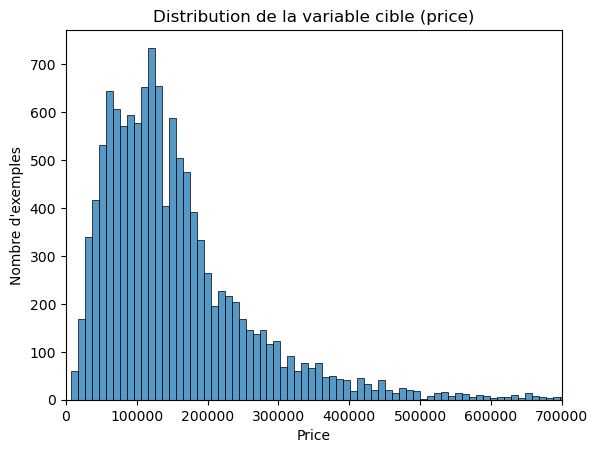

In [42]:
# 2_supprission la colonnes price qui va des valeurs NaN parce que cest la valeur cible en peut pas le remplacer 
df = df.dropna(subset=['price'])
print(df.isnull().sum())
df.shape
#pour resoudrer un probléme ecloncher dans le training 
print(df['price'].describe()) 
plt.xlim(0, 700_000)  # Limite l'axe X
sns.histplot(data=df, x='price')
plt.title('Distribution de la variable cible (price)')
plt.xlabel('Price')
plt.ylabel('Nombre d\'exemples')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [43]:
# 2_remplacement des NaN dans la colonne gearbox par lplus freq
most_frequent = df['gearbox'].mode()[0]
df['gearbox'] = df['gearbox'].fillna(most_frequent)
print(df.isnull().sum())

price              0
mileage           49
brand              7
model              7
doors           1392
origin          1501
fiscal_power      26
condition        561
year               1
gearbox            0
fuel_type          0
region             0
dtype: int64


In [44]:
# 3-remplacement de year
mean_year =  df['year'].mode()[0]
df['year'] = df['year'].fillna(mean_year)
print(df.isnull().sum())

price              0
mileage           49
brand              7
model              7
doors           1392
origin          1501
fiscal_power      26
condition        561
year               0
gearbox            0
fuel_type          0
region             0
dtype: int64


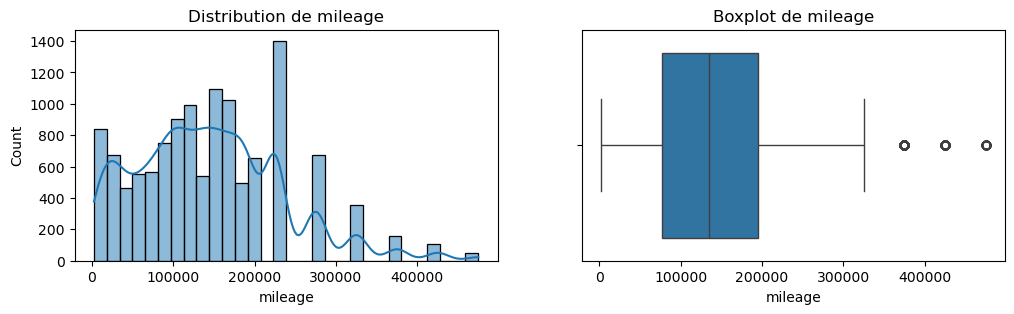

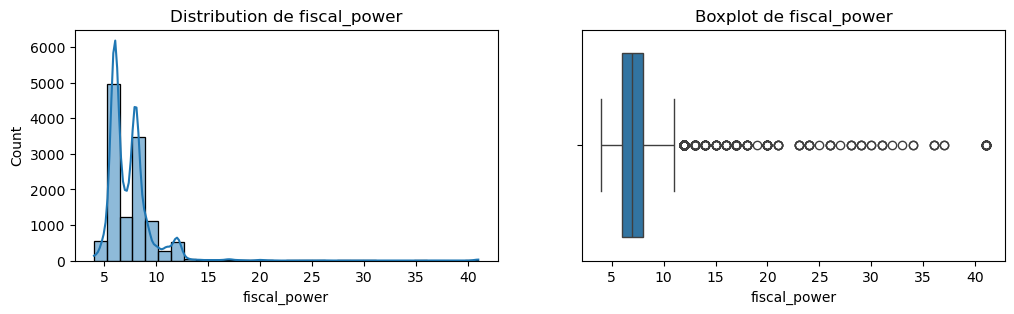

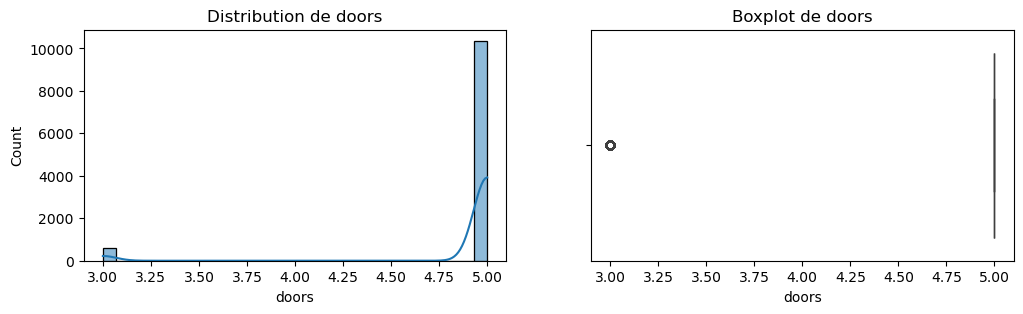

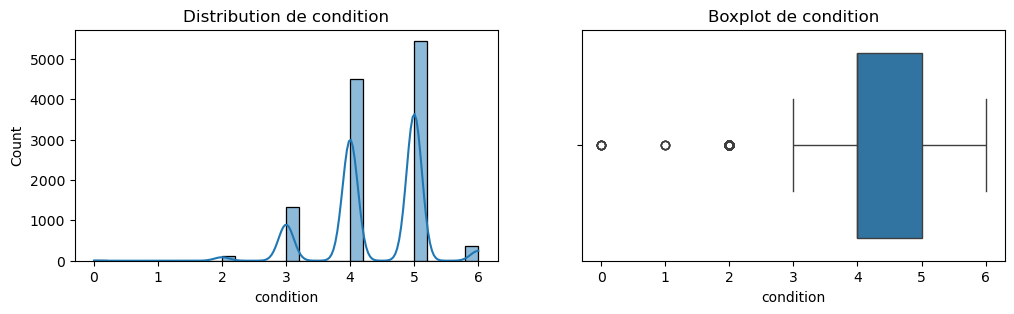

In [45]:
# 4_distrubition de mileage,fiscal_power,doors,condition
for col in ['mileage', 'fiscal_power', 'doors','condition']:
    plt.figure(figsize=(12,3))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution de {col}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    
    plt.show()

In [46]:
for col in ['fiscal_power', 'doors', 'mileage','condition']:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
print(df.isnull().sum())

price              0
mileage            0
brand              7
model              7
doors              0
origin          1501
fiscal_power       0
condition          0
year               0
gearbox            0
fuel_type          0
region             0
dtype: int64


In [47]:
# 5_rempplacement des nan dans colonnes brand,model,origin
# df['origin'] = df['origin'].fillna('unknown')
# df['brand'] = df['brand'].fillna('unknown')
# df['model'] = df['model'].fillna('unknown')
# print(df.isnull().sum())
# head_element(30)

## ÉTAPE 5 : Analyse de corrélation

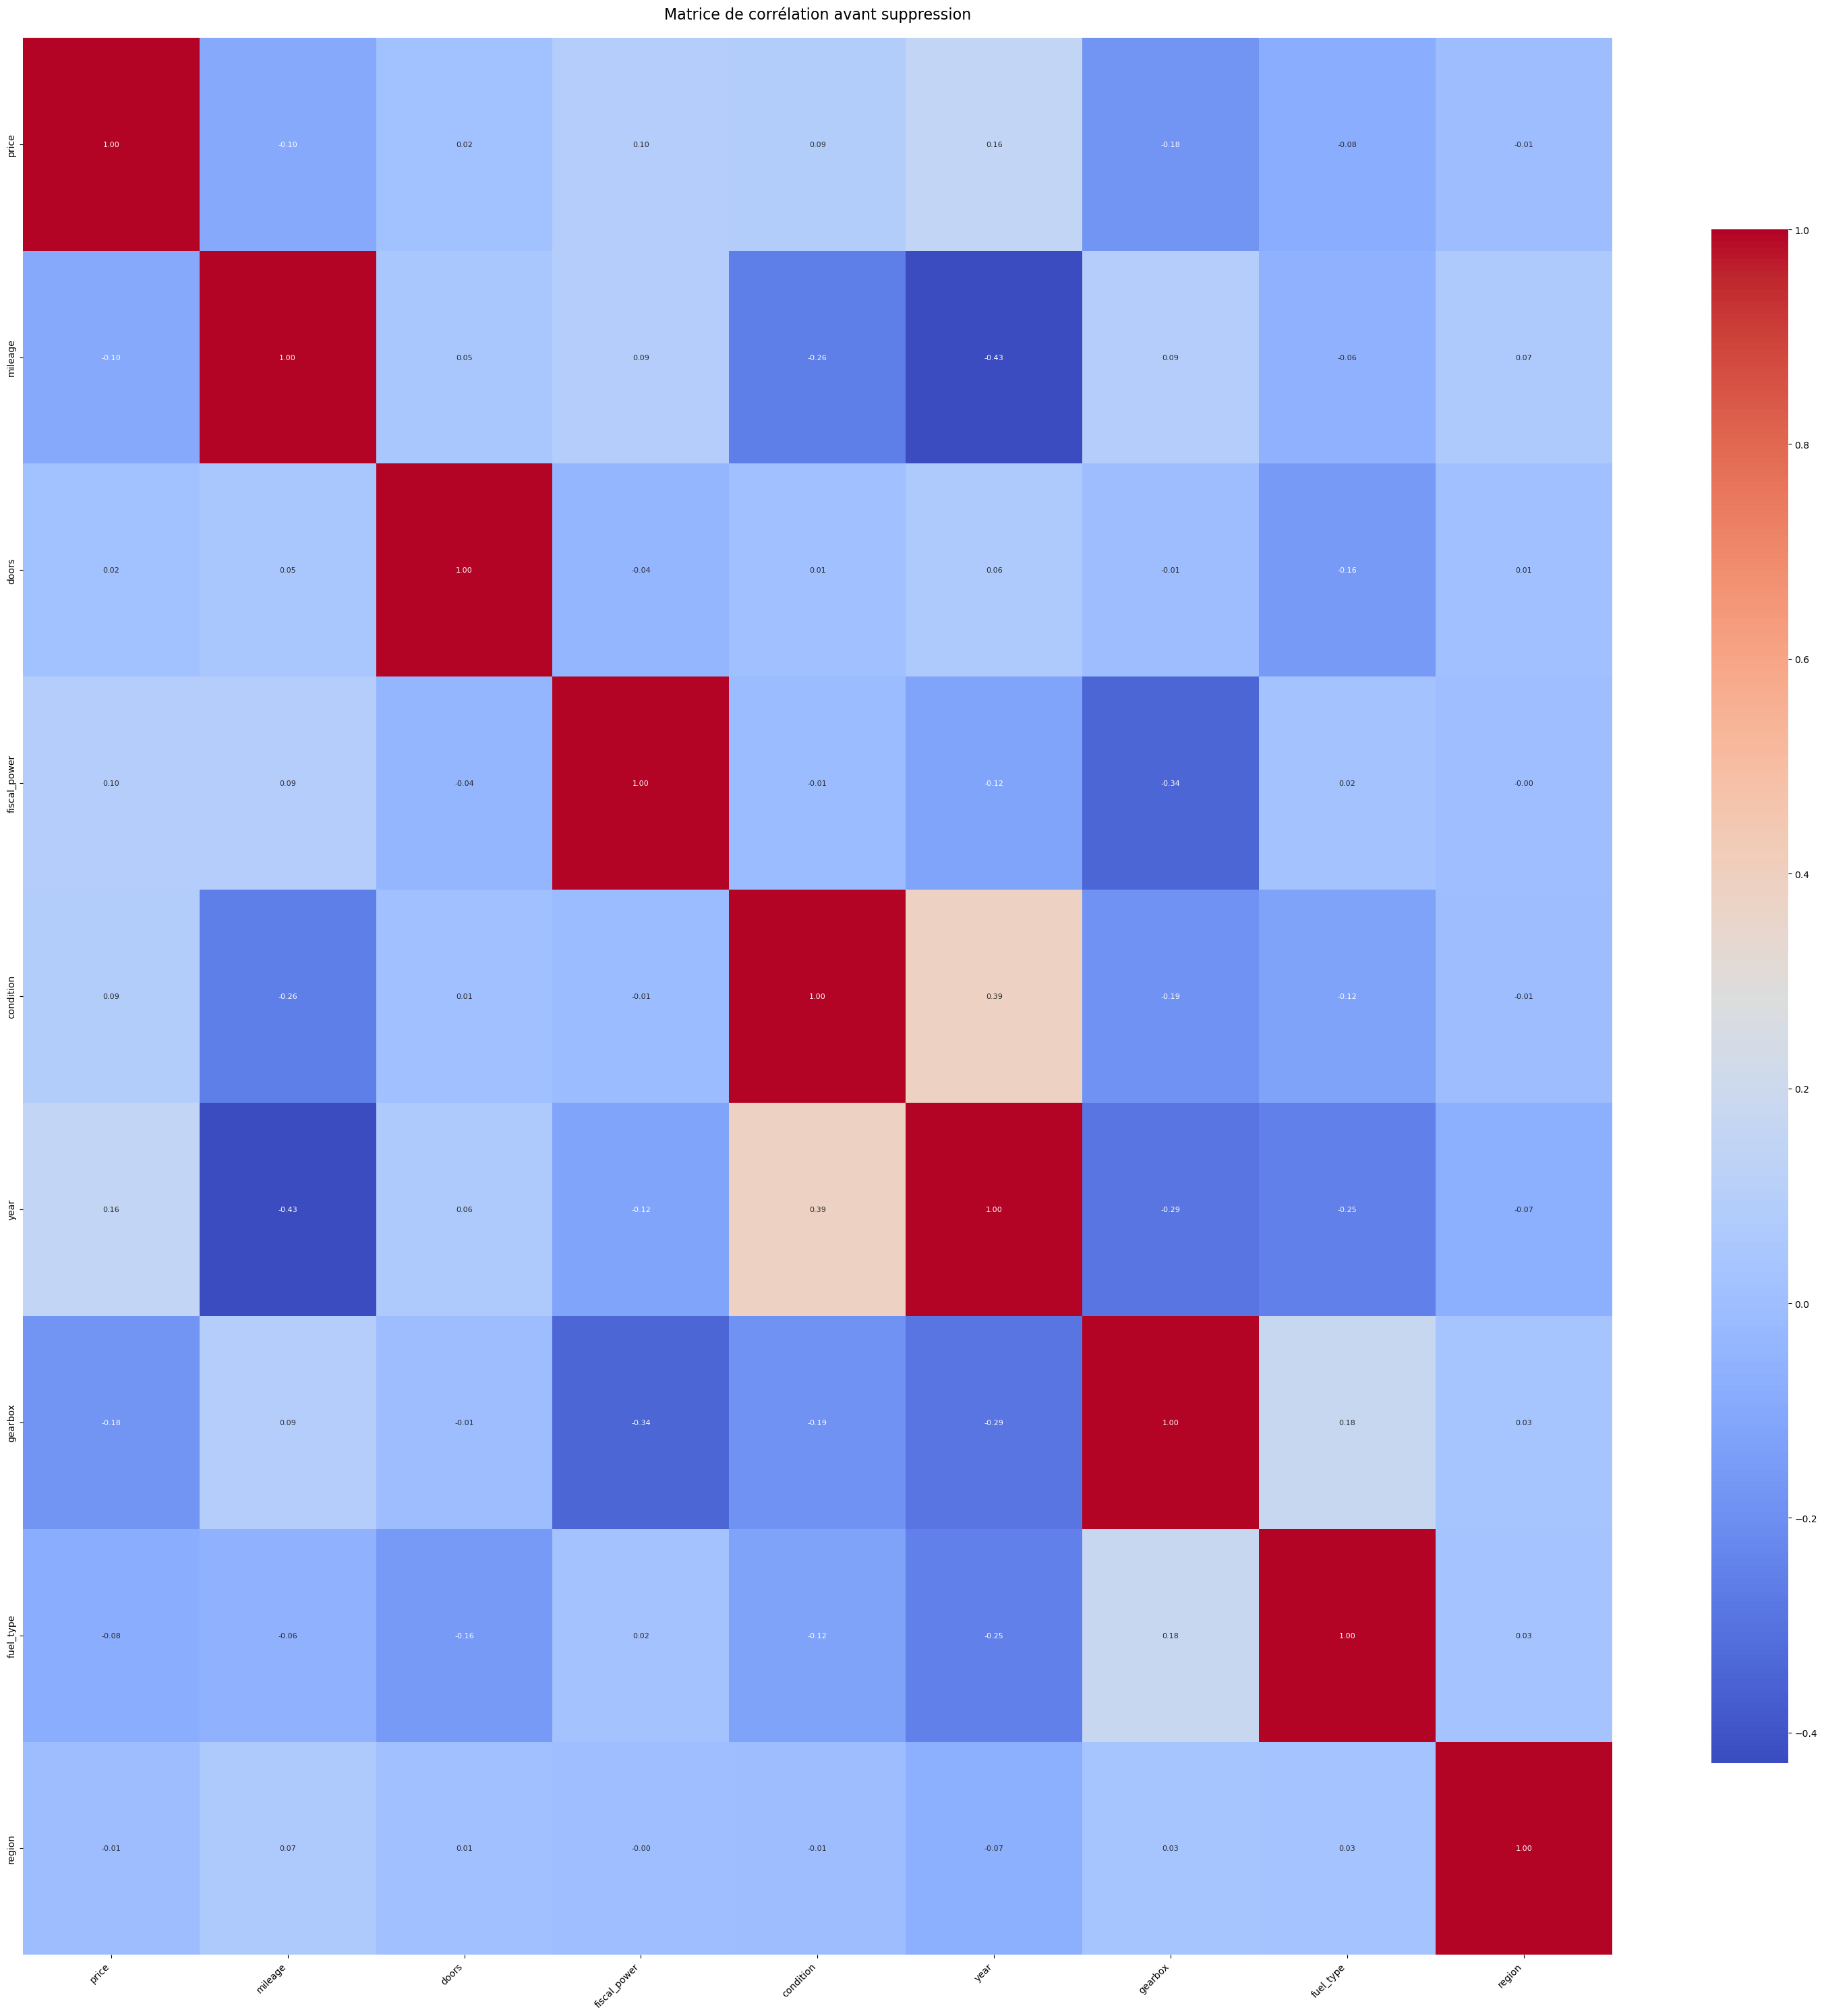

In [48]:
df_numeric = df.select_dtypes(include=['number'])

# 1. Calculer la matrice de corrélation
corr_matrix = df_numeric.corr()

# 2. Visualisation (adaptée aux grandes matrices)
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            annot_kws={'size': 8}, cbar_kws={'shrink': 0.8})
plt.title('Matrice de corrélation avant suppression', pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [49]:
df.head()

,price,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type,region
1,365000.0,144999.5,Volkswagen,Touareg,5.0,NaN,12.0,4.0,2021,0,1,1
2,198000.0,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,5.0,2024,1,1,1
3,79000.0,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3.0,2009,1,1,1
4,93000.0,77499.5,Fiat,500,5.0,WW au Maroc,6.0,4.0,2017,1,1,1
5,340000.0,104999.5,Mercedes-Benz,Classe GLC,5.0,NaN,9.0,4.0,2018,0,1,1


## ÉTAPE 6 : Détection et traitement des outliers

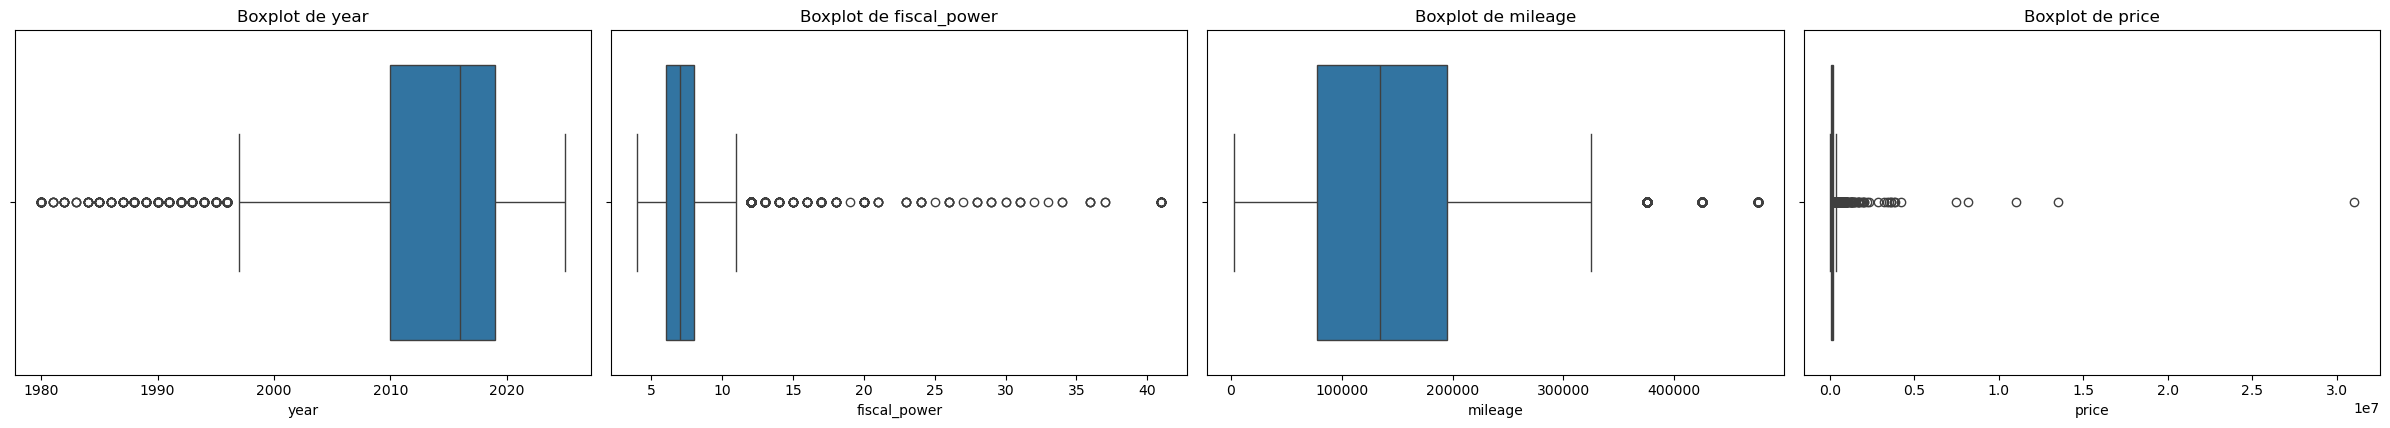

In [50]:
# Colonnes à analyser
def afficher_boxplots(df, colonnes, lignes=3, colonnes_par_ligne=4):
    plt.figure(figsize=(6 * colonnes_par_ligne, 4 * lignes))
    
    for i, col in enumerate(colonnes, 1):
        plt.subplot(lignes, colonnes_par_ligne, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()
cols = ['year','fiscal_power','mileage', 'price']
afficher_boxplots(df, cols)


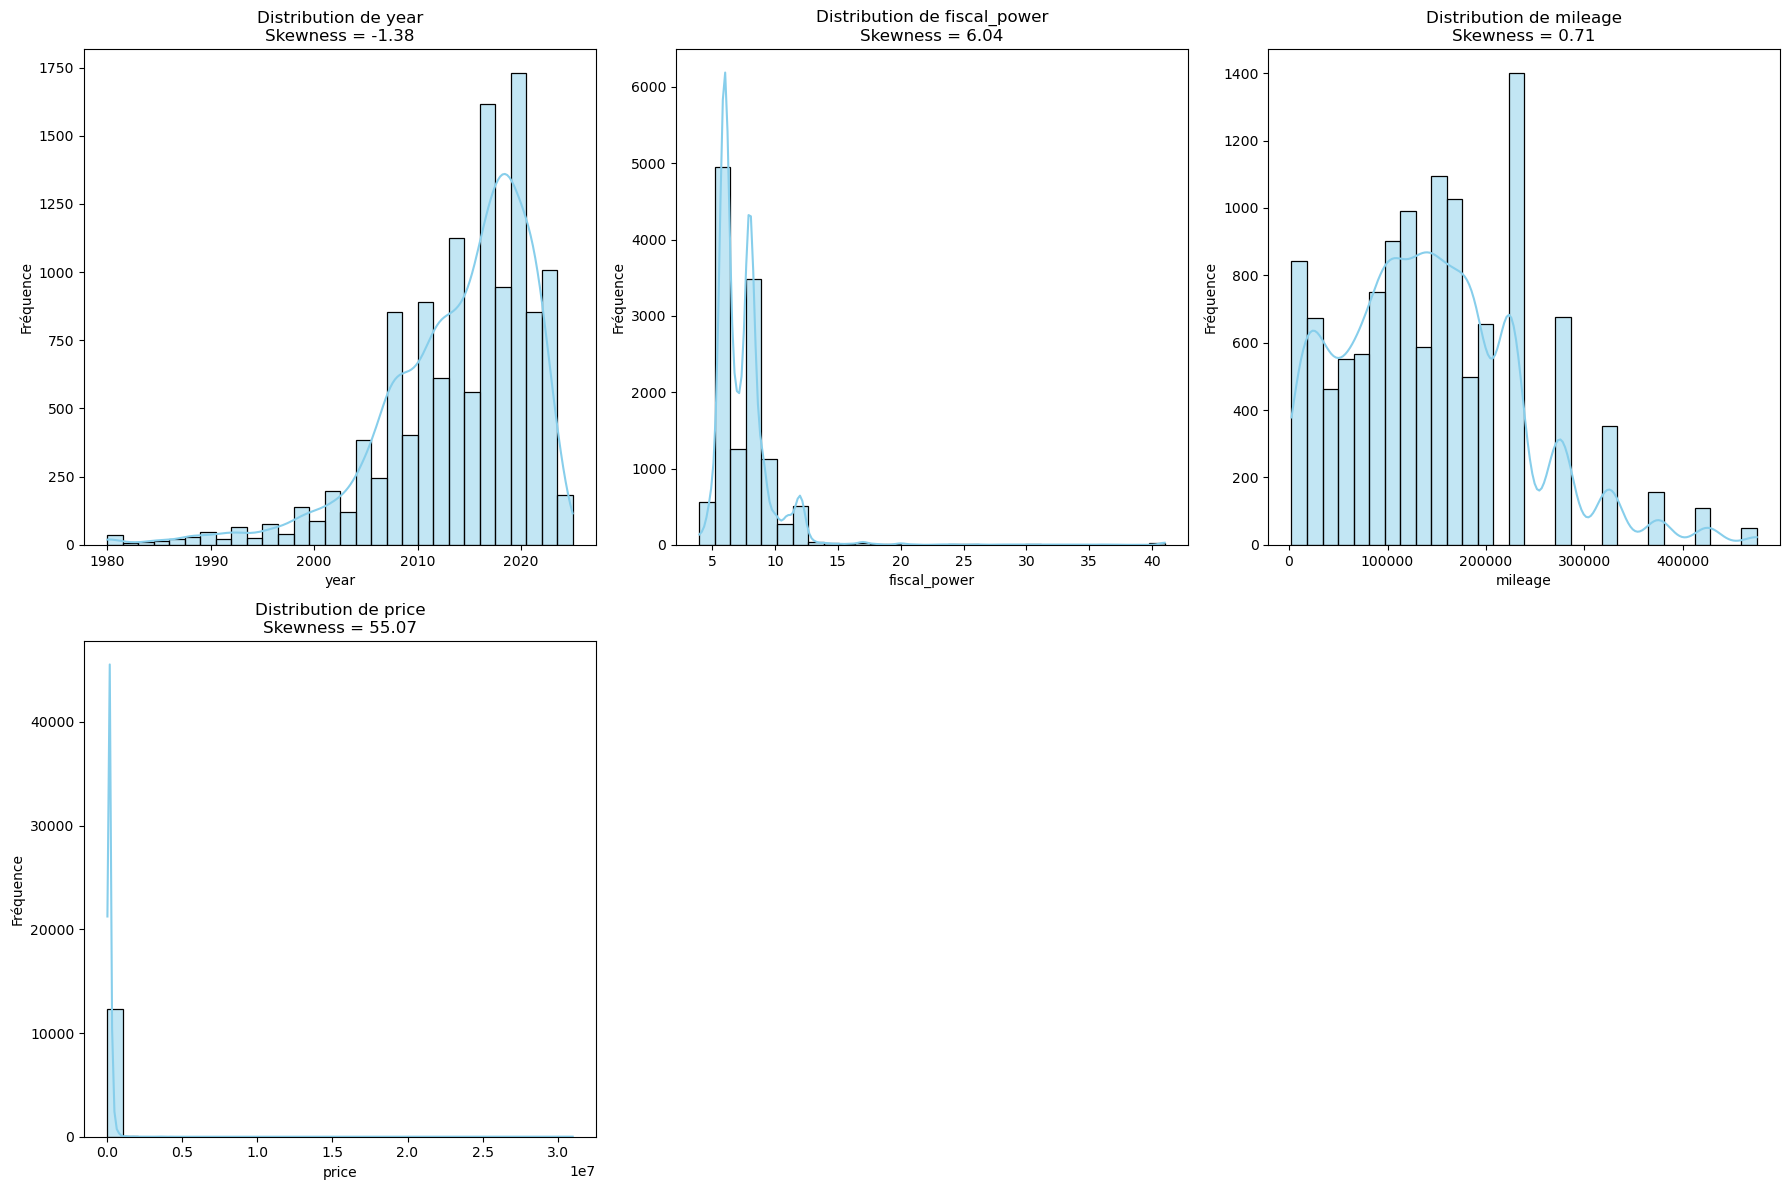

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes à analyser
cols_num = ['year','fiscal_power', 'mileage', 'price']

# Définir la taille de la figure
plt.figure(figsize=(18, 12))

# Boucle sur chaque colonne
for i, col in enumerate(cols_num, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution de {col}\nSkewness = {df[col].skew():.2f}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


In [52]:
cols_num = ['year', 'condition', 'fiscal_power', 'mileage']

for col in cols_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()
    
    df.loc[(df[col] < lower) | (df[col] > upper), col] = median

In [53]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower) | (df['price'] > upper)]
print("Nombre d'outliers dans 'price' :", outliers.shape[0])
df.shape
df = df[(df['price'] >= lower) & (df['price'] <= upper)]

Nombre d'outliers dans 'price' : 691


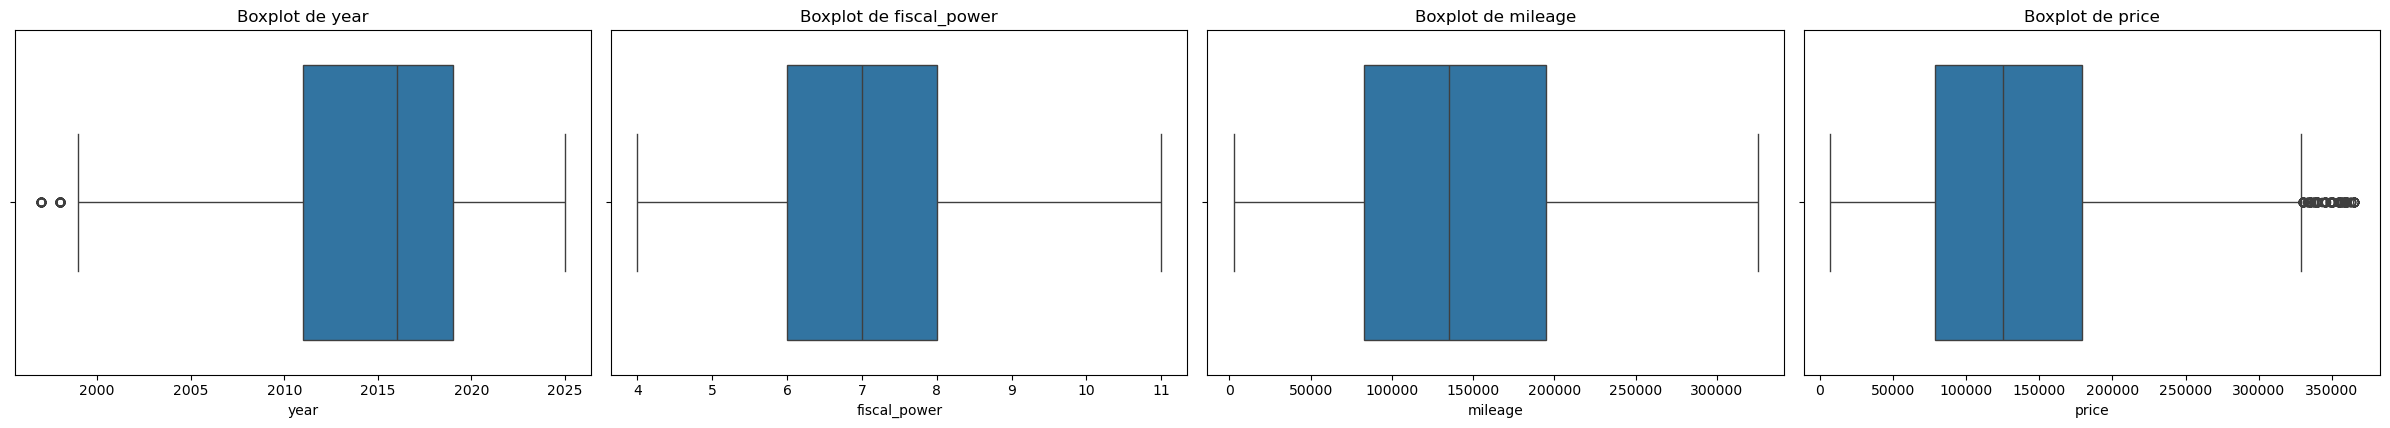

In [54]:
afficher_boxplots(df, cols)

In [ ]:
median_year = df['year'].median()
df.loc[(df['year'] < lower) | (df['year'] > upper), 'year'] = median_year


outliers_count = (df['price'] > 300000).sum()
print("Nombre de valeurs > 300000 :" ,outliers_count)

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.2 * IQR
df= df[df['price'] <= upper_limit]
afficher_boxplots(df, cols)
df.shape


## ETAPE 7 : balancing data 

In [56]:
df.head()

,price,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type,region
1,365000.0,144999.5,Volkswagen,Touareg,5.0,NaN,7.0,4.0,2021,0,1,1
2,198000.0,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,5.0,2024,1,1,1
3,79000.0,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3.0,2009,1,1,1
4,93000.0,77499.5,Fiat,500,5.0,WW au Maroc,6.0,4.0,2017,1,1,1
5,340000.0,104999.5,Mercedes-Benz,Classe GLC,5.0,NaN,9.0,4.0,2018,0,1,1


In [57]:
from joblib import load
label_encoder = load('dep\encoders\label_encoder_region.joblib')
df['region'] = label_encoder.inverse_transform(df['region'])

label_encoder = load('dep\encoders\label_encoder_fuel_type.joblib') 
df['fuel_type'] = label_encoder.inverse_transform(df['fuel_type'])

label_encoder = load('ordre_condition.joblib')
inverse_ordre_condition = {v: k for k, v in ordre_condition.items()}

# Décoder la colonne 'condition'
df['condition'] = df['condition'].map(inverse_ordre_condition)

df.head()

<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Client\AppData\Local\Temp\ipykernel_10956\4094652092.py:2: SyntaxWarning: invalid escape sequence '\e'
  label_encoder = load('dep\encoders\label_encoder_region.joblib')
C:\Users\Client\AppData\Local\Temp\ipykernel_10956\4094652092.py:5: SyntaxWarning: invalid escape sequence '\e'
  label_encoder = load('dep\encoders\label_encoder_fuel_type.joblib')


,price,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type,region
1,365000.0,144999.5,Volkswagen,Touareg,5.0,NaN,7.0,très bon,2021,0,diesel,Casablanca-Settat
2,198000.0,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,excellent,2024,1,diesel,Casablanca-Settat
3,79000.0,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,bon,2009,1,diesel,Casablanca-Settat
4,93000.0,77499.5,Fiat,500,5.0,WW au Maroc,6.0,très bon,2017,1,diesel,Casablanca-Settat
5,340000.0,104999.5,Mercedes-Benz,Classe GLC,5.0,NaN,9.0,très bon,2018,0,diesel,Casablanca-Settat


In [58]:
# Étape 1 : Identifier les marques dominantes (top N)
top_brands = df["model"].value_counts().head(350).index  # Top 10 marques

# Étape 2 : Regrouper les autres marques en "Autres"
df["model"] = df["model"].apply(lambda x: x if x in top_brands else "Autres")

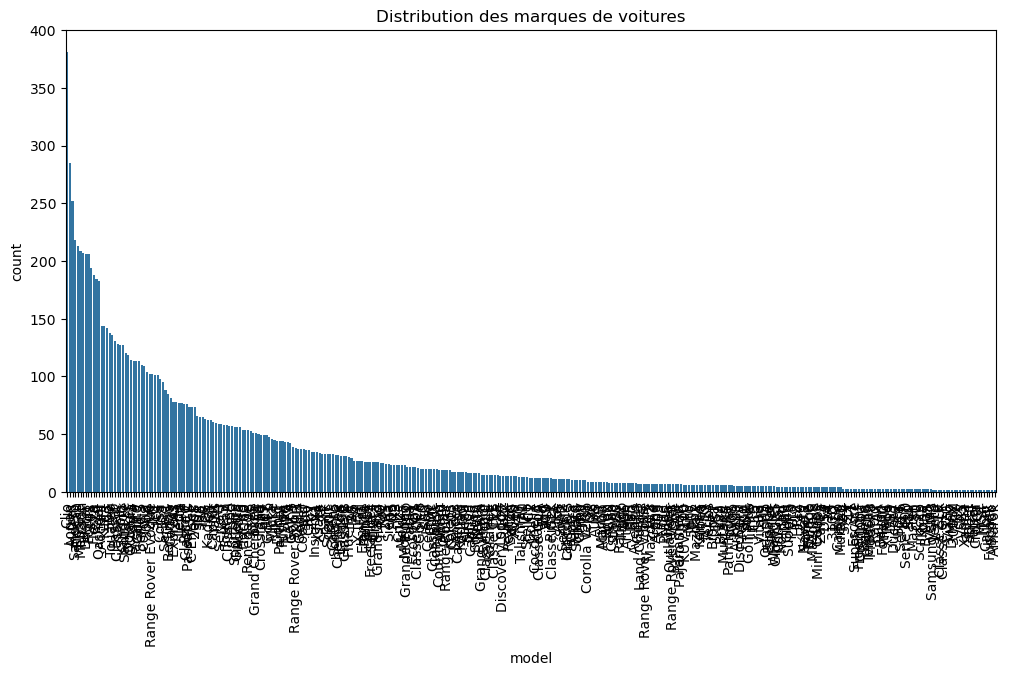

In [59]:
# Vérifier le déséquilibre pour chaque colonne catégorielle
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="model", order=df["model"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution des marques de voitures")
plt.show()

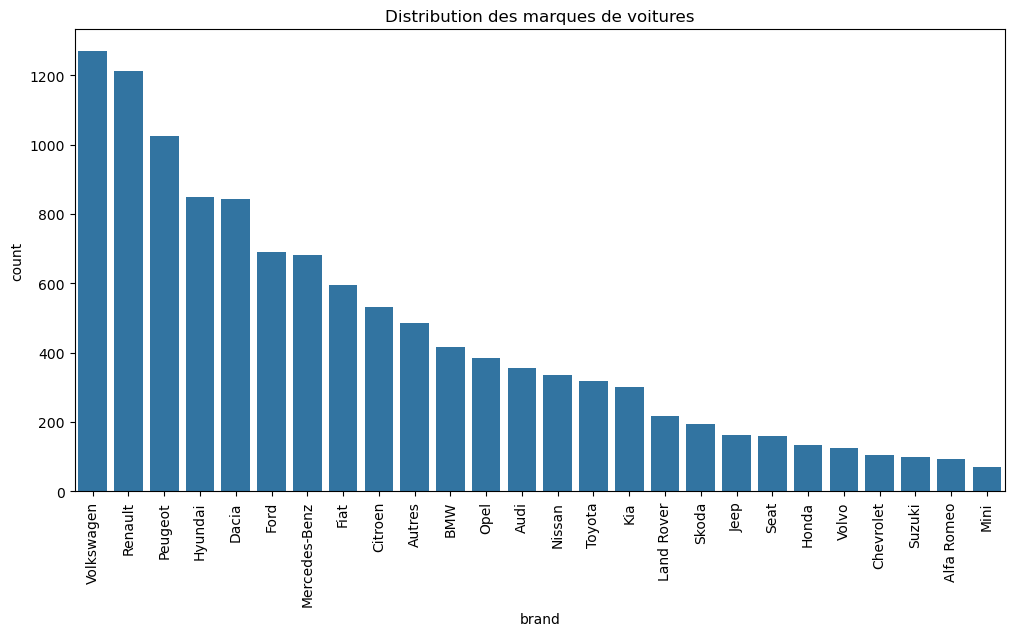

In [60]:
# Étape 1 : Identifier les marques dominantes (top N)
top_brands = df["brand"].value_counts().head(25).index  # Top 10 marques

# Étape 2 : Regrouper les autres marques en "Autres"
df["brand"] = df["brand"].apply(lambda x: x if x in top_brands else "Autres")

# Vérifier le déséquilibre pour chaque colonne catégorielle
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="brand", order=df["brand"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution des marques de voitures")
plt.show()

In [61]:
print(df['condition'].unique())

['très bon' 'excellent' 'bon' 'neuf']


In [62]:
# Convertir la colonne 'condition' en type catégoriel
df['condition'] = df['condition'].astype('category')

# Supprimer les catégories non utilisées (si nécessaire)
df['condition'] = df['condition'].cat.remove_unused_categories()

In [63]:
print("Catégories disponibles:", df['condition'].cat.categories)

Catégories disponibles: Index(['bon', 'excellent', 'neuf', 'très bon'], dtype='object')


In [64]:
valeurs_uniques = df['condition'].value_counts()
print("Détail des valeurs uniques et leurs occurrences :")
print(valeurs_uniques)

Détail des valeurs uniques et leurs occurrences :
condition
excellent    5047
très bon     4979
bon          1313
neuf          318
Name: count, dtype: int64


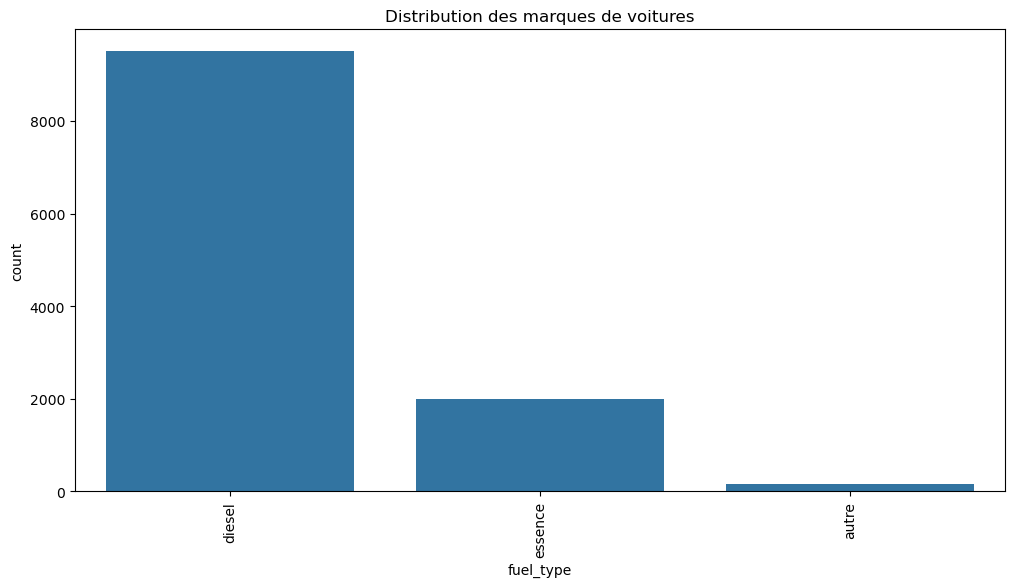

In [65]:
# Remplacer "Autre" par NaN puis supprimer
df['fuel_type'] = df['fuel_type'].replace({'Autre': None, 3: None, 4: None})  # Adaptez selon vos valeurs
df = df.dropna(subset=['fuel_type'])

# Conversion en entiers (optionnel)
df['fuel_type'] = df['fuel_type'].astype(object)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="fuel_type", order=df["fuel_type"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution des marques de voitures")
plt.show()

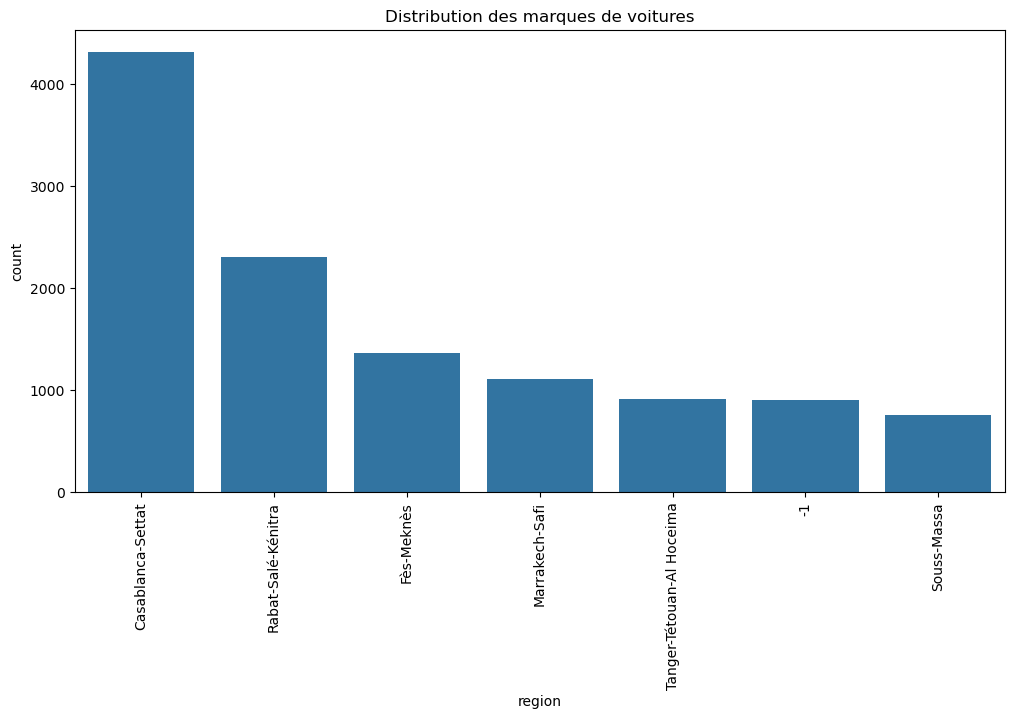

In [66]:
# Identifier les régions fréquentes (ex: > 5% des données)
from collections import Counter
region_counts = Counter(df['region'])
threshold = len(df) * 0.05
top_regions = [k for k, v in region_counts.items() if v >= threshold]

# Créer une nouvelle colonne regroupée
df['region'] = df['region'].apply(lambda x: x if x in top_regions else -1)  # -1 = "Autres"
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="region", order=df["region"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution des marques de voitures")
plt.show()

In [67]:
df['region'] = df['region'].astype(str)

In [68]:
import joblib
label_encoders = {
    'fuel_type': LabelEncoder().fit(df['fuel_type']),  # À adapter si 'fuel_type' est déjà supprimé
    'region': LabelEncoder().fit(df['region'].astype(str))
}

# Sauvegarde des encodeurs
for col, encoder in label_encoders.items():
    joblib.dump(encoder, f"label_encoder_final_{col}.joblib")

df['fuel_type'] = label_encoders['fuel_type'].transform(df['fuel_type'])
df['region'] = label_encoders['region'].transform(df['region'])

df.head()

,price,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type,region
1,365000.0,144999.5,Volkswagen,Touareg,5.0,NaN,7.0,très bon,2021,0,1,1
2,198000.0,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,excellent,2024,1,1,1
3,79000.0,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,bon,2009,1,1,1
4,93000.0,77499.5,Fiat,500,5.0,WW au Maroc,6.0,très bon,2017,1,1,1
5,340000.0,104999.5,Mercedes-Benz,Classe GLC,5.0,NaN,9.0,très bon,2018,0,1,1


In [69]:
# 1. Définir l'ordre hiérarchique exact
hierarchy_order = ['neuf', 'excellent', 'très bon', 'bon']  # Du meilleur au moins bon

# 2. Créer un mapping manuel respectant l'ordre
condition_mapping = {v: i for i, v in enumerate(hierarchy_order)}
# Résultat: {'neuf':0, 'excellent':1, 'très bon':2, 'bon':3}

# 3. Application du mapping
df['condition'] = df['condition'].map(condition_mapping)

# 5. Sauvegarde du mapping
joblib.dump(condition_mapping, 'condition_mapping.joblib')
df.head()

,price,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type,region
1,365000.0,144999.5,Volkswagen,Touareg,5.0,NaN,7.0,2,2021,0,1,1
2,198000.0,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,1,2024,1,1,1
3,79000.0,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3,2009,1,1,1
4,93000.0,77499.5,Fiat,500,5.0,WW au Maroc,6.0,2,2017,1,1,1
5,340000.0,104999.5,Mercedes-Benz,Classe GLC,5.0,NaN,9.0,2,2018,0,1,1


In [70]:
# df.drop('doors', axis=1, inplace=True)

# eda

In [ ]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.price, df.model)
plt.xlabel("price (DH)", fontsize=14)
plt.ylabel("year of model", fontsize=14)
plt.title("Scatter plot of price and year of model",fontsize=18)
plt.show()

NameError: name 'plt' is not defined

In [71]:
df.to_excel("df_pretraiter_final4.xlsx", index=False)

In [72]:
valeurs_uniques = df['gearbox'].unique()
print("Valeurs uniques dans 'gearbox':")
print(valeurs_uniques)

Valeurs uniques dans 'gearbox':
[0 1 2]
